In [1]:
import matplotlib.pyplot as plt
from mxnet import nd, autograd, gluon
from mxnet import init
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

In [2]:
def get_dataloader(batch_size):
    transformer = transforms.Compose([
        transforms.ToTensor()
    ])
    train = gluon.data.vision.datasets.FashionMNIST(train=True)
    train = train.transform_first(transformer)
    train_iter = gluon.data.DataLoader(train, batch_size, shuffle=True, num_workers=4)
    test = gluon.data.vision.datasets.FashionMNIST(train=False)
    test = test.transform_first(transformer)
    test_iter = gluon.data.DataLoader(test, batch_size, shuffle=False, num_workers=4)
    return train_iter, test_iter

In [3]:
def show_images(X, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    axes = axes.flatten()
    for img, ax in zip(X, axes):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    return axes

In [15]:
def softmax(X):
    X_exp = X.exp()
    normalization_constant = X_exp.sum(axis=1, keepdims=True)
    return X_exp / normalization_constant

In [13]:
def accuracy(net, data_iter):
    acc = 0
    size = 0
    for X, y in data_iter:
        res = net(X)
        y_hat = softmax(res)
        acc += (y_hat.argmax(axis=1)==y.astype('float32')).sum().asscalar()
        size += len(y)
    return acc / size

In [4]:
batch_size = 256
train_iter, test_iter = get_dataloader(batch_size)

In [17]:
num_inputs = 28 * 28
num_hidden = 512
num_outputs = 10

In [18]:
net = nn.Sequential()
net.add(nn.Dense(num_hidden, activation='relu'))
net.add(nn.Dense(num_outputs))
net.initialize(init.Normal(0.01))

loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate':0.1})

In [20]:
epochs = 15
for epoch in range(epochs):
    for X, y in train_iter:
        with autograd.record():
            result = net(X)
            l = loss(result, y)
        l.backward()
        trainer.step(batch_size)
    epoch_acc = accuracy(net, train_iter)
    print("Epoch %d, acc: %f" % (epoch, epoch_acc))

Epoch 0, acc: 0.870067
Epoch 1, acc: 0.871183
Epoch 2, acc: 0.878133
Epoch 3, acc: 0.876917
Epoch 4, acc: 0.874733
Epoch 5, acc: 0.882400
Epoch 6, acc: 0.886483
Epoch 7, acc: 0.886017
Epoch 8, acc: 0.890017
Epoch 9, acc: 0.891250
Epoch 10, acc: 0.892850
Epoch 11, acc: 0.891067
Epoch 12, acc: 0.891883
Epoch 13, acc: 0.892567
Epoch 14, acc: 0.895167


(256, 1, 28, 28)
(256,)


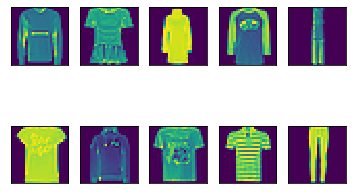

In [5]:
for X, y in train_iter:
    print(X.shape)
    print(y.shape)
    show_images(X.squeeze(axis=1).asnumpy(), 2, 5)
    break